In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesClassifier

In [3]:
df = pd.read_csv("/Users/fatemeh/Thises/exprimentalResult/ActivityClassification/PMData_Analysis/Classification/3/MOX2_5_data_labelled.csv")
df.head()
#print(df.columns)

,sedentary,LPA,MPA,VPA,steps,active
0,111078,4138,1466,814,9876,2
1,112274,4640,1976,704,10074,3
2,134114,4104,2560,114,11014,3
3,80186,3288,2814,176,7656,2
4,79104,5564,1448,176,12114,3


In [10]:
df2 = pd.read_csv("/Users/fatemeh/Thises/exprimentalResult/ActivityClassification/PMData_Analysis/Classification/2/MOX2_5_data_unlabelled.csv")
columns = ['IMA', 'WeightBearing', 'Sedentary', 'Standing', 'LPA', 'MPA', 'VPA', 'Steps']
df3 = df2[columns]
df2.head()

,Date,IMA,WeightBearing,Sedentary,Standing,LPA,MPA,VPA,Steps
0,8/11/2021,91815,1878,111078,1286,4138,1466,814,9876
1,9/11/2021,100642,3226,112274,2144,4640,1976,704,10074
2,10/11/2021,137141,3120,134114,3048,4104,2560,114,11014
3,11/11/2021,90231,292,80186,240,3288,2814,176,7656
4,12/11/2021,97236,18,79104,18,5564,1448,176,12114


In [13]:
data = df.drop(columns=['active'])
cor  = data.corr()
cor.style.background_gradient(cmap='GnBu')

,sedentary,LPA,MPA,VPA,steps
sedentary,1.000000,0.190126,0.086197,0.217722,0.353007
LPA,0.190126,1.000000,0.183030,0.242950,0.712723
MPA,0.086197,0.183030,1.000000,0.490670,0.664682
VPA,0.217722,0.242950,0.490670,1.000000,0.584620
steps,0.353007,0.712723,0.664682,0.584620,1.000000


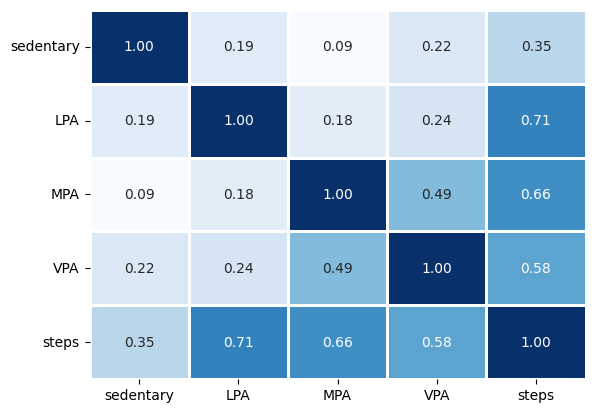

In [14]:
fig, ax = plt.subplots()
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('Blues'), cbar=False, linewidths=1, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('Corr_result_in_mox.png', bbox_inches='tight', pad_inches=0.0, dpi=300)

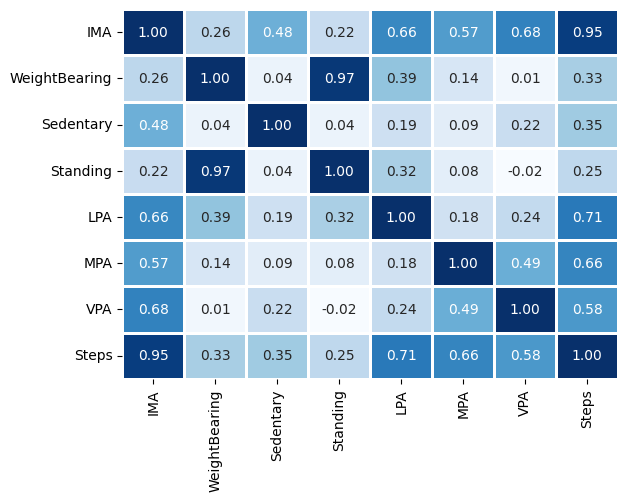

In [15]:
fig, ax = plt.subplots()
sns.heatmap(df3.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('Blues'), cbar=False, linewidths=1, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('Corrrr_result_in_mox.png', bbox_inches='tight', pad_inches=0.0, dpi=300)

In [8]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,sedentary,LPA,MPA,VPA,steps
sedentary,1.000000,0.190126,0.086197,0.217722,0.353007
LPA,0.190126,1.000000,0.183030,0.242950,0.712723
MPA,0.086197,0.183030,1.000000,0.490670,0.664682
VPA,0.217722,0.242950,0.490670,1.000000,0.584620
steps,0.353007,0.712723,0.664682,0.584620,1.000000


/var/folders/yr/hy7b_nl94zg6x7p5xd0ypr180000gn/T/ipykernel_63425/3470518475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='active', data = df, palette = "Set2", saturation = 0.1)


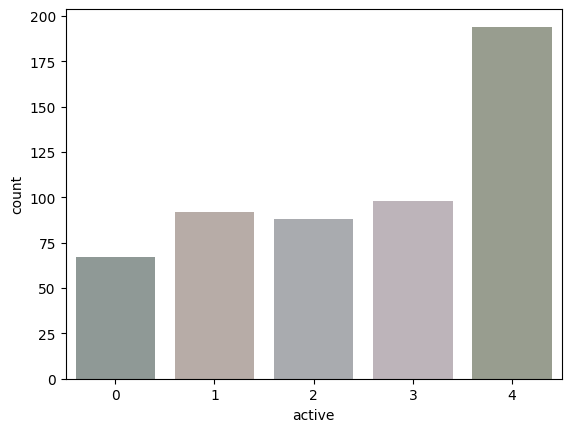

In [9]:
# count plot on single categorical variable
sns.countplot(x ='active', data = df, palette = "Set2", saturation = 0.1)

plt.savefig('Distribution_of_classes_MOX.png', bbox_inches='tight', pad_inches=1.0, dpi=300)

In [10]:
df.isnull().values.any()

np.False_

In [11]:
df.shape

(539, 6)

In [12]:
X = df[['steps', 'sedentary', 'LPA', 'MPA', 'VPA']]
Y = df['active']

In [13]:
#Feature selection
#SelectKBest
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X,Y)

set_printoptions(precision=2)
print(fit.scores_)

mask = fit.get_support()
print("Mask:", mask)

selected_features = X.columns[mask]
print("Selected feature names:", selected_features)

featured_data = fit.transform(X)
print ("\nFeatured data:\n", featured_data[0:5])

[1124239.68  485622.78  434239.95  162037.25  177750.78]
Mask: [ True  True  True  True  True]
Selected feature names: Index(['steps', 'sedentary', 'LPA', 'MPA', 'VPA'], dtype='object')

Featured data:
 [[  9876 111078   4138   1466    814]
 [ 10074 112274   4640   1976    704]
 [ 11014 134114   4104   2560    114]
 [  7656  80186   3288   2814    176]
 [ 12114  79104   5564   1448    176]]


In [14]:
#PCA
pca = PCA(n_components=5)
fit = pca.fit(X)
print(fit.get_feature_names_out())
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

['pca0' 'pca1' 'pca2' 'pca3' 'pca4']
Explained Variance: [9.65e-01 2.97e-02 4.06e-03 8.88e-04 3.97e-04]
[[ 6.16e-02  9.98e-01  1.85e-02  3.45e-03  9.04e-03]
 [ 8.91e-01 -6.42e-02  4.12e-01  1.31e-01  1.19e-01]
 [-3.14e-01  6.89e-03  8.55e-01 -3.26e-01 -2.52e-01]
 [-1.73e-01 -2.31e-04  1.52e-01 -1.76e-01  9.57e-01]
 [-2.71e-01  7.79e-03  2.73e-01  9.20e-01  7.70e-02]]


In [ ]:
# Feature Importance
# ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_names_in_)
print(model.feature_importances_)

['steps' 'sedentary' 'LPA' 'MPA' 'VPA']
[0.52 0.07 0.17 0.16 0.08]
